In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [23]:
(train_images,train_labels), (test_images,test_labels) = datasets.cifar10.load_data()

In [24]:
#normalising data
train_images,test_images= train_images/255 , test_images/255

## Model1

In [25]:
#model1

model1 = models.Sequential()
model1.add(layers.Conv2D(32,(5,5),activation = 'relu' , input_shape = (32,32,3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (5, 5), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(64 , activation = 'relu'))
model1.add(layers.Dense(10 , activation = 'softmax'))
model1.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

## model1 results

In [26]:
model1.compile( optimizer = 'adam' , 
             loss = 'sparse_categorical_crossentropy' ,
             metrics = ['accuracy'] ) 
history = model1.fit(train_images , train_labels , epochs = 10 , validation_split = 0.2 , shuffle = True )

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 32s 808us/sample - loss: 1.5648 - acc: 0.4318 - val_loss: 1.3503 - val_acc: 0.5206
Epoch 2/10
40000/40000 [==============================] - 33s 820us/sample - loss: 1.2254 - acc: 0.5652 - val_loss: 1.1379 - val_acc: 0.6031
Epoch 3/10
40000/40000 [==============================] - 32s 800us/sample - loss: 1.0816 - acc: 0.6182 - val_loss: 1.0608 - val_acc: 0.6304
Epoch 4/10
40000/40000 [==============================] - 32s 798us/sample - loss: 0.9804 - acc: 0.6547 - val_loss: 1.0422 - val_acc: 0.6393
Epoch 5/10
40000/40000 [==============================] - 33s 814us/sample - loss: 0.9051 - acc: 0.6848 - val_loss: 0.9923 - val_acc: 0.6599
Epoch 6/10
40000/40000 [==============================] - 32s 801us/sample - loss: 0.8444 - acc: 0.7038 - val_loss: 1.0221 - val_acc: 0.6580
Epoch 7/10
40000/40000 [==============================] - 34s 840us/sample - loss: 0.7887 - acc: 0.7229 

10000/10000 - 2s - loss: 0.9818 - acc: 0.6789
0.6789


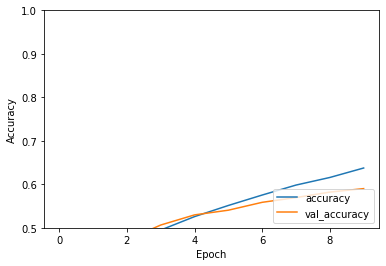

In [77]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

## Model2 

In [44]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32,(5,5),activation = 'relu' , input_shape = (32,32,3)))
model2.add(layers.MaxPooling2D((3, 3)))
model2.add(layers.Conv2D(64, (5, 5), activation='relu'))
model2.add(layers.MaxPooling2D((3, 3)))
model2.add(layers.Flatten())
model2.add(layers.Dense(64 , activation = 'relu'))
model2.add(layers.Dense(10 , activation = 'softmax'))
model2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 5, 5, 64)          51264     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 10)              

In [46]:
model2.compile( optimizer = 'adam' , 
             loss = 'sparse_categorical_crossentropy' ,
             metrics = ['accuracy'] ) 
history = model2.fit(train_images , train_labels , epochs = 10 , validation_split = 0.2 , shuffle = True )

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 16s 406us/sample - loss: 1.1516 - acc: 0.5972 - val_loss: 1.2207 - val_acc: 0.5755
Epoch 2/10
40000/40000 [==============================] - 21s 516us/sample - loss: 1.1132 - acc: 0.6097 - val_loss: 1.2306 - val_acc: 0.5763
Epoch 3/10
40000/40000 [==============================] - 20s 507us/sample - loss: 1.0733 - acc: 0.6242 - val_loss: 1.1750 - val_acc: 0.5981
Epoch 4/10
40000/40000 [==============================] - 20s 493us/sample - loss: 1.0369 - acc: 0.6378 - val_loss: 1.1404 - val_acc: 0.6088
Epoch 5/10
40000/40000 [==============================] - 22s 559us/sample - loss: 1.0156 - acc: 0.6456 - val_loss: 1.1543 - val_acc: 0.6091
Epoch 6/10
40000/40000 [==============================] - 22s 548us/sample - loss: 0.9797 - acc: 0.6592 - val_loss: 1.1553 - val_acc: 0.6025
Epoch 7/10
40000/40000 [==============================] - 19s 473us/sample - loss: 0.9586 - acc: 0.6664 

## Model2 results

10000/10000 - 1s - loss: 1.1876 - acc: 0.6078


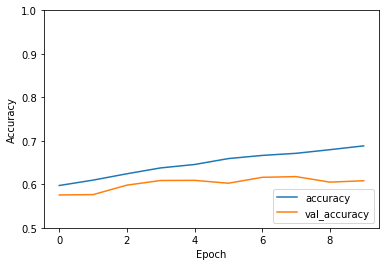

In [47]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

## Model 3

In [32]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32,(3,3),activation = 'relu' , input_shape = (32,32,3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(64 , activation = 'relu'))
model3.add(layers.Dense(10 , activation = 'softmax'))
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                147520    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [33]:
model3.compile( optimizer = 'adam' , 
             loss = 'sparse_categorical_crossentropy' ,
             metrics = ['accuracy'] ) 
history = model3.fit(train_images , train_labels , epochs = 10 , validation_split = 0.2 , shuffle = True )

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 19s 487us/sample - loss: 1.5224 - acc: 0.4534 - val_loss: 1.2616 - val_acc: 0.5630
Epoch 2/10
40000/40000 [==============================] - 24s 611us/sample - loss: 1.1577 - acc: 0.5910 - val_loss: 1.1177 - val_acc: 0.6090
Epoch 3/10
40000/40000 [==============================] - 25s 637us/sample - loss: 1.0233 - acc: 0.6422 - val_loss: 1.0558 - val_acc: 0.6262
Epoch 4/10
40000/40000 [==============================] - 20s 505us/sample - loss: 0.9372 - acc: 0.6755 - val_loss: 0.9888 - val_acc: 0.6566
Epoch 5/10
40000/40000 [==============================] - 20s 505us/sample - loss: 0.8680 - acc: 0.6956 - val_loss: 0.9641 - val_acc: 0.6666
Epoch 6/10
40000/40000 [==============================] - 25s 627us/sample - loss: 0.8097 - acc: 0.7188 - val_loss: 0.9207 - val_acc: 0.6834
Epoch 7/10
40000/40000 [==============================] - 25s 619us/sample - loss: 0.7593 - acc: 0.7368 

## Model3 results

10000/10000 - 2s - loss: 0.9632 - acc: 0.6888


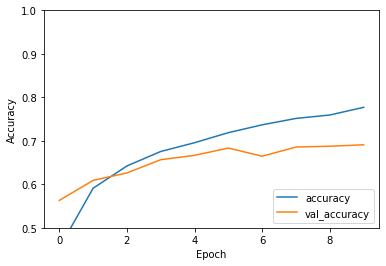

In [38]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)

## Model4 

In [39]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32,(3,3),activation = 'relu' , input_shape = (32,32,3)))
model4.add(layers.MaxPooling2D((2,2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(64 , activation = 'relu'))
model4.add(layers.Dense(10 , activation = 'softmax'))
model4.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)             

In [40]:
model4.compile( optimizer = 'adam' , 
             loss = 'sparse_categorical_crossentropy' ,
             metrics = ['accuracy'] ) 
history = model4.fit(train_images , train_labels , epochs = 10 , validation_split = 0.2 , shuffle = True )

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 29s 722us/sample - loss: 1.5809 - acc: 0.4236 - val_loss: 1.3064 - val_acc: 0.5360
Epoch 2/10
40000/40000 [==============================] - 28s 705us/sample - loss: 1.2088 - acc: 0.5722 - val_loss: 1.1417 - val_acc: 0.6014
Epoch 3/10
40000/40000 [==============================] - 29s 733us/sample - loss: 1.0646 - acc: 0.6263 - val_loss: 1.0866 - val_acc: 0.6220
Epoch 4/10
40000/40000 [==============================] - 28s 704us/sample - loss: 0.9561 - acc: 0.6635 - val_loss: 0.9838 - val_acc: 0.6599
Epoch 5/10
40000/40000 [==============================] - 29s 721us/sample - loss: 0.8748 - acc: 0.6941 - val_loss: 0.9258 - val_acc: 0.6771
Epoch 6/10
40000/40000 [==============================] - 33s 828us/sample - loss: 0.8036 - acc: 0.7180 - val_loss: 0.9538 - val_acc: 0.6760
Epoch 7/10
40000/40000 [==============================] - 32s 797us/sample - loss: 0.7442 - acc: 0.7404 

## Model4 results

10000/10000 - 2s - loss: 0.9310 - acc: 0.6932


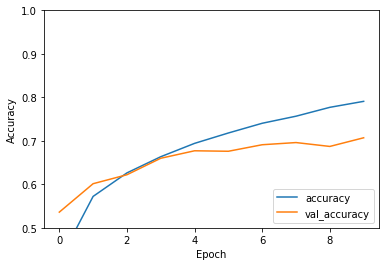

In [41]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model4.evaluate(test_images,  test_labels, verbose=2)

## Model4 is the best model since it has best test accuracy among other 3 models

## Model 5 

In [51]:
#model5

model5 = models.Sequential()
model5.add(layers.Conv2D(32,(5,5),strides=(2,2),activation = 'relu' , input_shape = (32,32,3)))
model5.add(layers.MaxPooling2D((2, 2),strides=(2,2)))
model5.add(layers.Conv2D(64, (5, 5),strides=(2,2),activation='relu'))
model5.add(layers.MaxPooling2D((2, 2),strides=(2,2)))
model5.add(layers.Flatten())
model5.add(layers.Dense(64 , activation = 'relu'))
model5.add(layers.Dense(10 , activation = 'softmax'))
model5.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 14, 14, 32)        2432      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 2, 2, 64)          51264     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 10)              

In [52]:
model5.compile( optimizer = 'adam' , 
             loss = 'sparse_categorical_crossentropy' ,
             metrics = ['accuracy'] ) 
history = model5.fit(train_images , train_labels , epochs = 10 , validation_split = 0.2 , shuffle = True )

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 7s 165us/sample - loss: 1.7312 - acc: 0.3610 - val_loss: 1.5341 - val_acc: 0.4483
Epoch 2/10
40000/40000 [==============================] - 9s 220us/sample - loss: 1.4312 - acc: 0.4783 - val_loss: 1.4385 - val_acc: 0.4941
Epoch 3/10
40000/40000 [==============================] - 10s 258us/sample - loss: 1.3283 - acc: 0.5196 - val_loss: 1.3125 - val_acc: 0.5303
Epoch 4/10
40000/40000 [==============================] - 10s 261us/sample - loss: 1.2484 - acc: 0.5475 - val_loss: 1.2424 - val_acc: 0.5578
Epoch 5/10
40000/40000 [==============================] - 10s 262us/sample - loss: 1.1788 - acc: 0.5764 - val_loss: 1.2200 - val_acc: 0.5693
Epoch 6/10
40000/40000 [==============================] - 10s 262us/sample - loss: 1.1257 - acc: 0.5982 - val_loss: 1.1731 - val_acc: 0.5863
Epoch 7/10
40000/40000 [==============================] - 10s 261us/sample - loss: 1.0830 - acc: 0.6133 - 

## Model5 evaluation

10000/10000 - 1s - loss: 1.1254 - acc: 0.6111


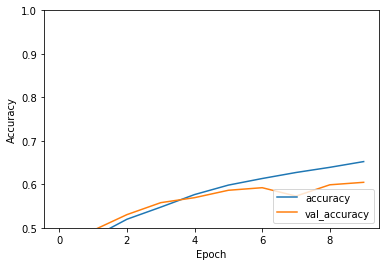

In [53]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model5.evaluate(test_images,  test_labels, verbose=2)

## Model 6

In [56]:
model6 = models.Sequential()
model6.add(layers.Conv2D(32,(3,3),activation = 'relu' , input_shape = (32,32,3),padding='same'))
model6.add(layers.MaxPooling2D((2,2),padding='same'))
model6.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model6.add(layers.MaxPooling2D((2, 2),padding='same'))
model6.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model6.add(layers.MaxPooling2D((2, 2),padding='same'))
model6.add(layers.Flatten())
model6.add(layers.Dense(64 , activation = 'relu'))
model6.add(layers.Dense(10 , activation = 'softmax'))
model6.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 2048)            

In [57]:
model6.compile( optimizer = 'adam' , 
             loss = 'sparse_categorical_crossentropy' ,
             metrics = ['accuracy'] ) 
history = model6.fit(train_images , train_labels , epochs = 10 , validation_split = 0.2 , shuffle = True )

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 43s 1ms/sample - loss: 1.4869 - acc: 0.4611 - val_loss: 1.2053 - val_acc: 0.5702
Epoch 2/10
40000/40000 [==============================] - 43s 1ms/sample - loss: 1.0550 - acc: 0.6298 - val_loss: 0.9724 - val_acc: 0.6647
Epoch 3/10
40000/40000 [==============================] - 43s 1ms/sample - loss: 0.8725 - acc: 0.6964 - val_loss: 0.9615 - val_acc: 0.6693
Epoch 4/10
40000/40000 [==============================] - 41s 1ms/sample - loss: 0.7564 - acc: 0.7366 - val_loss: 0.8426 - val_acc: 0.7122
Epoch 5/10
40000/40000 [==============================] - 42s 1ms/sample - loss: 0.6620 - acc: 0.7671 - val_loss: 0.8175 - val_acc: 0.7223
Epoch 6/10
40000/40000 [==============================] - 43s 1ms/sample - loss: 0.5901 - acc: 0.7929 - val_loss: 0.8780 - val_acc: 0.7114
Epoch 7/10
40000/40000 [==============================] - 41s 1ms/sample - loss: 0.5224 - acc: 0.8170 - val_loss: 0.

## Model6 results

10000/10000 - 3s - loss: 0.9788 - acc: 0.7153


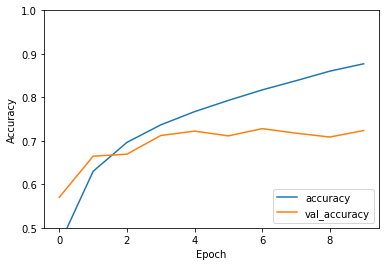

In [58]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model6.evaluate(test_images,  test_labels, verbose=2)

## model7

In [60]:

model7 = models.Sequential()
model7.add(layers.Conv2D(32,(5,5),strides=(2,2),padding='same',activation = 'relu' , input_shape = (32,32,3)))
model7.add(layers.MaxPooling2D((2, 2),strides=(2,2),padding='same'))
model7.add(layers.Conv2D(64, (5, 5),strides=(2,2),activation='relu',padding='same'))
model7.add(layers.MaxPooling2D((2, 2),strides=(2,2),padding='same'))
model7.add(layers.Flatten())
model7.add(layers.Dense(64 , activation = 'relu'))
model7.add(layers.Dense(10 , activation = 'softmax'))
model7.summary()


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 16, 16, 32)        2432      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 4, 4, 64)          51264     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_29 (Dense)             (None, 10)              

In [61]:
model7.compile( optimizer = 'adam' , 
           loss = 'sparse_categorical_crossentropy' ,
             metrics = ['accuracy'] ) 
history = model7.fit(train_images , train_labels , epochs = 10 , validation_split = 0.2 , shuffle = True )

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 14s 348us/sample - loss: 1.5881 - acc: 0.4212 - val_loss: 1.3383 - val_acc: 0.5190
Epoch 2/10
40000/40000 [==============================] - 13s 331us/sample - loss: 1.2619 - acc: 0.5472 - val_loss: 1.2276 - val_acc: 0.5636
Epoch 3/10
40000/40000 [==============================] - 13s 328us/sample - loss: 1.1297 - acc: 0.5997 - val_loss: 1.1416 - val_acc: 0.5968
Epoch 4/10
40000/40000 [==============================] - 13s 332us/sample - loss: 1.0463 - acc: 0.6294 - val_loss: 1.0913 - val_acc: 0.6218
Epoch 5/10
40000/40000 [==============================] - 14s 347us/sample - loss: 0.9717 - acc: 0.6579 - val_loss: 1.0927 - val_acc: 0.6220
Epoch 6/10
40000/40000 [==============================] - 14s 340us/sample - loss: 0.9150 - acc: 0.6774 - val_loss: 1.1087 - val_acc: 0.6189
Epoch 7/10
40000/40000 [==============================] - 14s 345us/sample - loss: 0.8666 - acc: 0.6931 

10000/10000 - 1s - loss: 1.0753 - acc: 0.6394


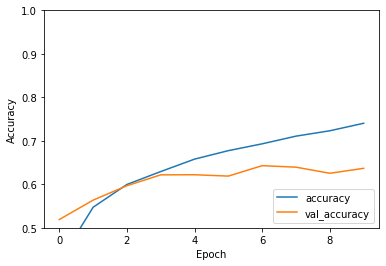

In [63]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model7.evaluate(test_images,  test_labels, verbose=2)

## model6 is best among other models since it has best test accuracy (71.513%)among others..

## Model 8

In [64]:
model8 = models.Sequential()
model8.add(layers.Conv2D(32,(3,3),activation = 'tanh' , input_shape = (32,32,3),padding='same'))
model8.add(layers.MaxPooling2D((2,2),padding='same'))
model8.add(layers.Conv2D(64, (3, 3), activation='tanh',padding='same'))
model8.add(layers.MaxPooling2D((2, 2),padding='same'))
model8.add(layers.Conv2D(128, (3, 3), activation='tanh',padding='same'))
model8.add(layers.MaxPooling2D((2, 2),padding='same'))
model8.add(layers.Flatten())
model8.add(layers.Dense(64 , activation = 'tanh'))
model8.add(layers.Dense(10 , activation = 'softmax'))
model8.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 2048)            

In [65]:
model8.compile( optimizer = 'adam' , 
           loss = 'sparse_categorical_crossentropy' ,
             metrics = ['accuracy'] ) 
history = model8.fit(train_images , train_labels , epochs = 10 , validation_split = 0.2 , shuffle = True )

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 1.3368 - acc: 0.5253 - val_loss: 1.0737 - val_acc: 0.6224
Epoch 2/10
40000/40000 [==============================] - 44s 1ms/sample - loss: 0.9762 - acc: 0.6599 - val_loss: 0.9697 - val_acc: 0.6640
Epoch 3/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.8345 - acc: 0.7099 - val_loss: 0.9519 - val_acc: 0.6746
Epoch 4/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.7192 - acc: 0.7519 - val_loss: 0.9227 - val_acc: 0.6878
Epoch 5/10
40000/40000 [==============================] - 46s 1ms/sample - loss: 0.6247 - acc: 0.7822 - val_loss: 0.9118 - val_acc: 0.7007
Epoch 6/10
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.5273 - acc: 0.8202 - val_loss: 0.9343 - val_acc: 0.6938
Epoch 7/10
40000/40000 [==============================] - 46s 1ms/sample - loss: 0.4551 - acc: 0.8435 - val_loss: 0.

10000/10000 - 3s - loss: 1.1068 - acc: 0.6898


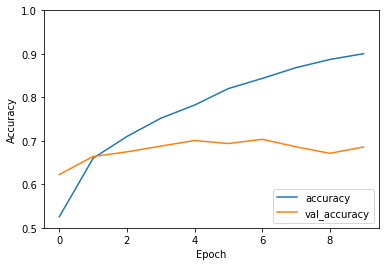

In [67]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model8.evaluate(test_images,  test_labels, verbose=2)

## Model 9

In [73]:
model9 = models.Sequential()
model9.add(layers.Conv2D(32,(3,3),activation = 'sigmoid' , input_shape = (32,32,3),padding='same'))
model9.add(layers.MaxPooling2D((2,2),padding='same'))
model9.add(layers.Conv2D(64, (3, 3), activation='sigmoid',padding='same'))
model9.add(layers.MaxPooling2D((2, 2),padding='same'))
model9.add(layers.Conv2D(128, (3, 3), activation='sigmoid',padding='same'))
model9.add(layers.MaxPooling2D((2, 2),padding='same'))
model9.add(layers.Flatten())
model9.add(layers.Dense(64 , activation = 'sigmoid'))
model9.add(layers.Dense(10 , activation = 'softmax'))
model9.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 2048)            

In [74]:
model9.compile( optimizer = 'adam' , 
           loss = 'sparse_categorical_crossentropy' ,
             metrics = ['accuracy'] ) 
history = model9.fit(train_images , train_labels , epochs = 10 , validation_split = 0.2 , shuffle = True )

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 44s 1ms/sample - loss: 2.3088 - acc: 0.1000 - val_loss: 2.3076 - val_acc: 0.1014
Epoch 2/10
40000/40000 [==============================] - 42s 1ms/sample - loss: 1.9710 - acc: 0.2744 - val_loss: 1.6728 - val_acc: 0.4028
Epoch 3/10
40000/40000 [==============================] - 44s 1ms/sample - loss: 1.5472 - acc: 0.4461 - val_loss: 1.4746 - val_acc: 0.4721
Epoch 4/10
40000/40000 [==============================] - 44s 1ms/sample - loss: 1.4125 - acc: 0.4949 - val_loss: 1.3853 - val_acc: 0.5064
Epoch 5/10
40000/40000 [==============================] - 44s 1ms/sample - loss: 1.3285 - acc: 0.5257 - val_loss: 1.3267 - val_acc: 0.5297
Epoch 6/10
40000/40000 [==============================] - 44s 1ms/sample - loss: 1.2613 - acc: 0.5514 - val_loss: 1.2944 - val_acc: 0.5405
Epoch 7/10
40000/40000 [==============================] - 43s 1ms/sample - loss: 1.1974 - acc: 0.5753 - val_loss: 1.

In [ ]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model9.evaluate(test_images,  test_labels, verbose=2)

## Model 6 gives the best result among all the models since it has best test accuracy

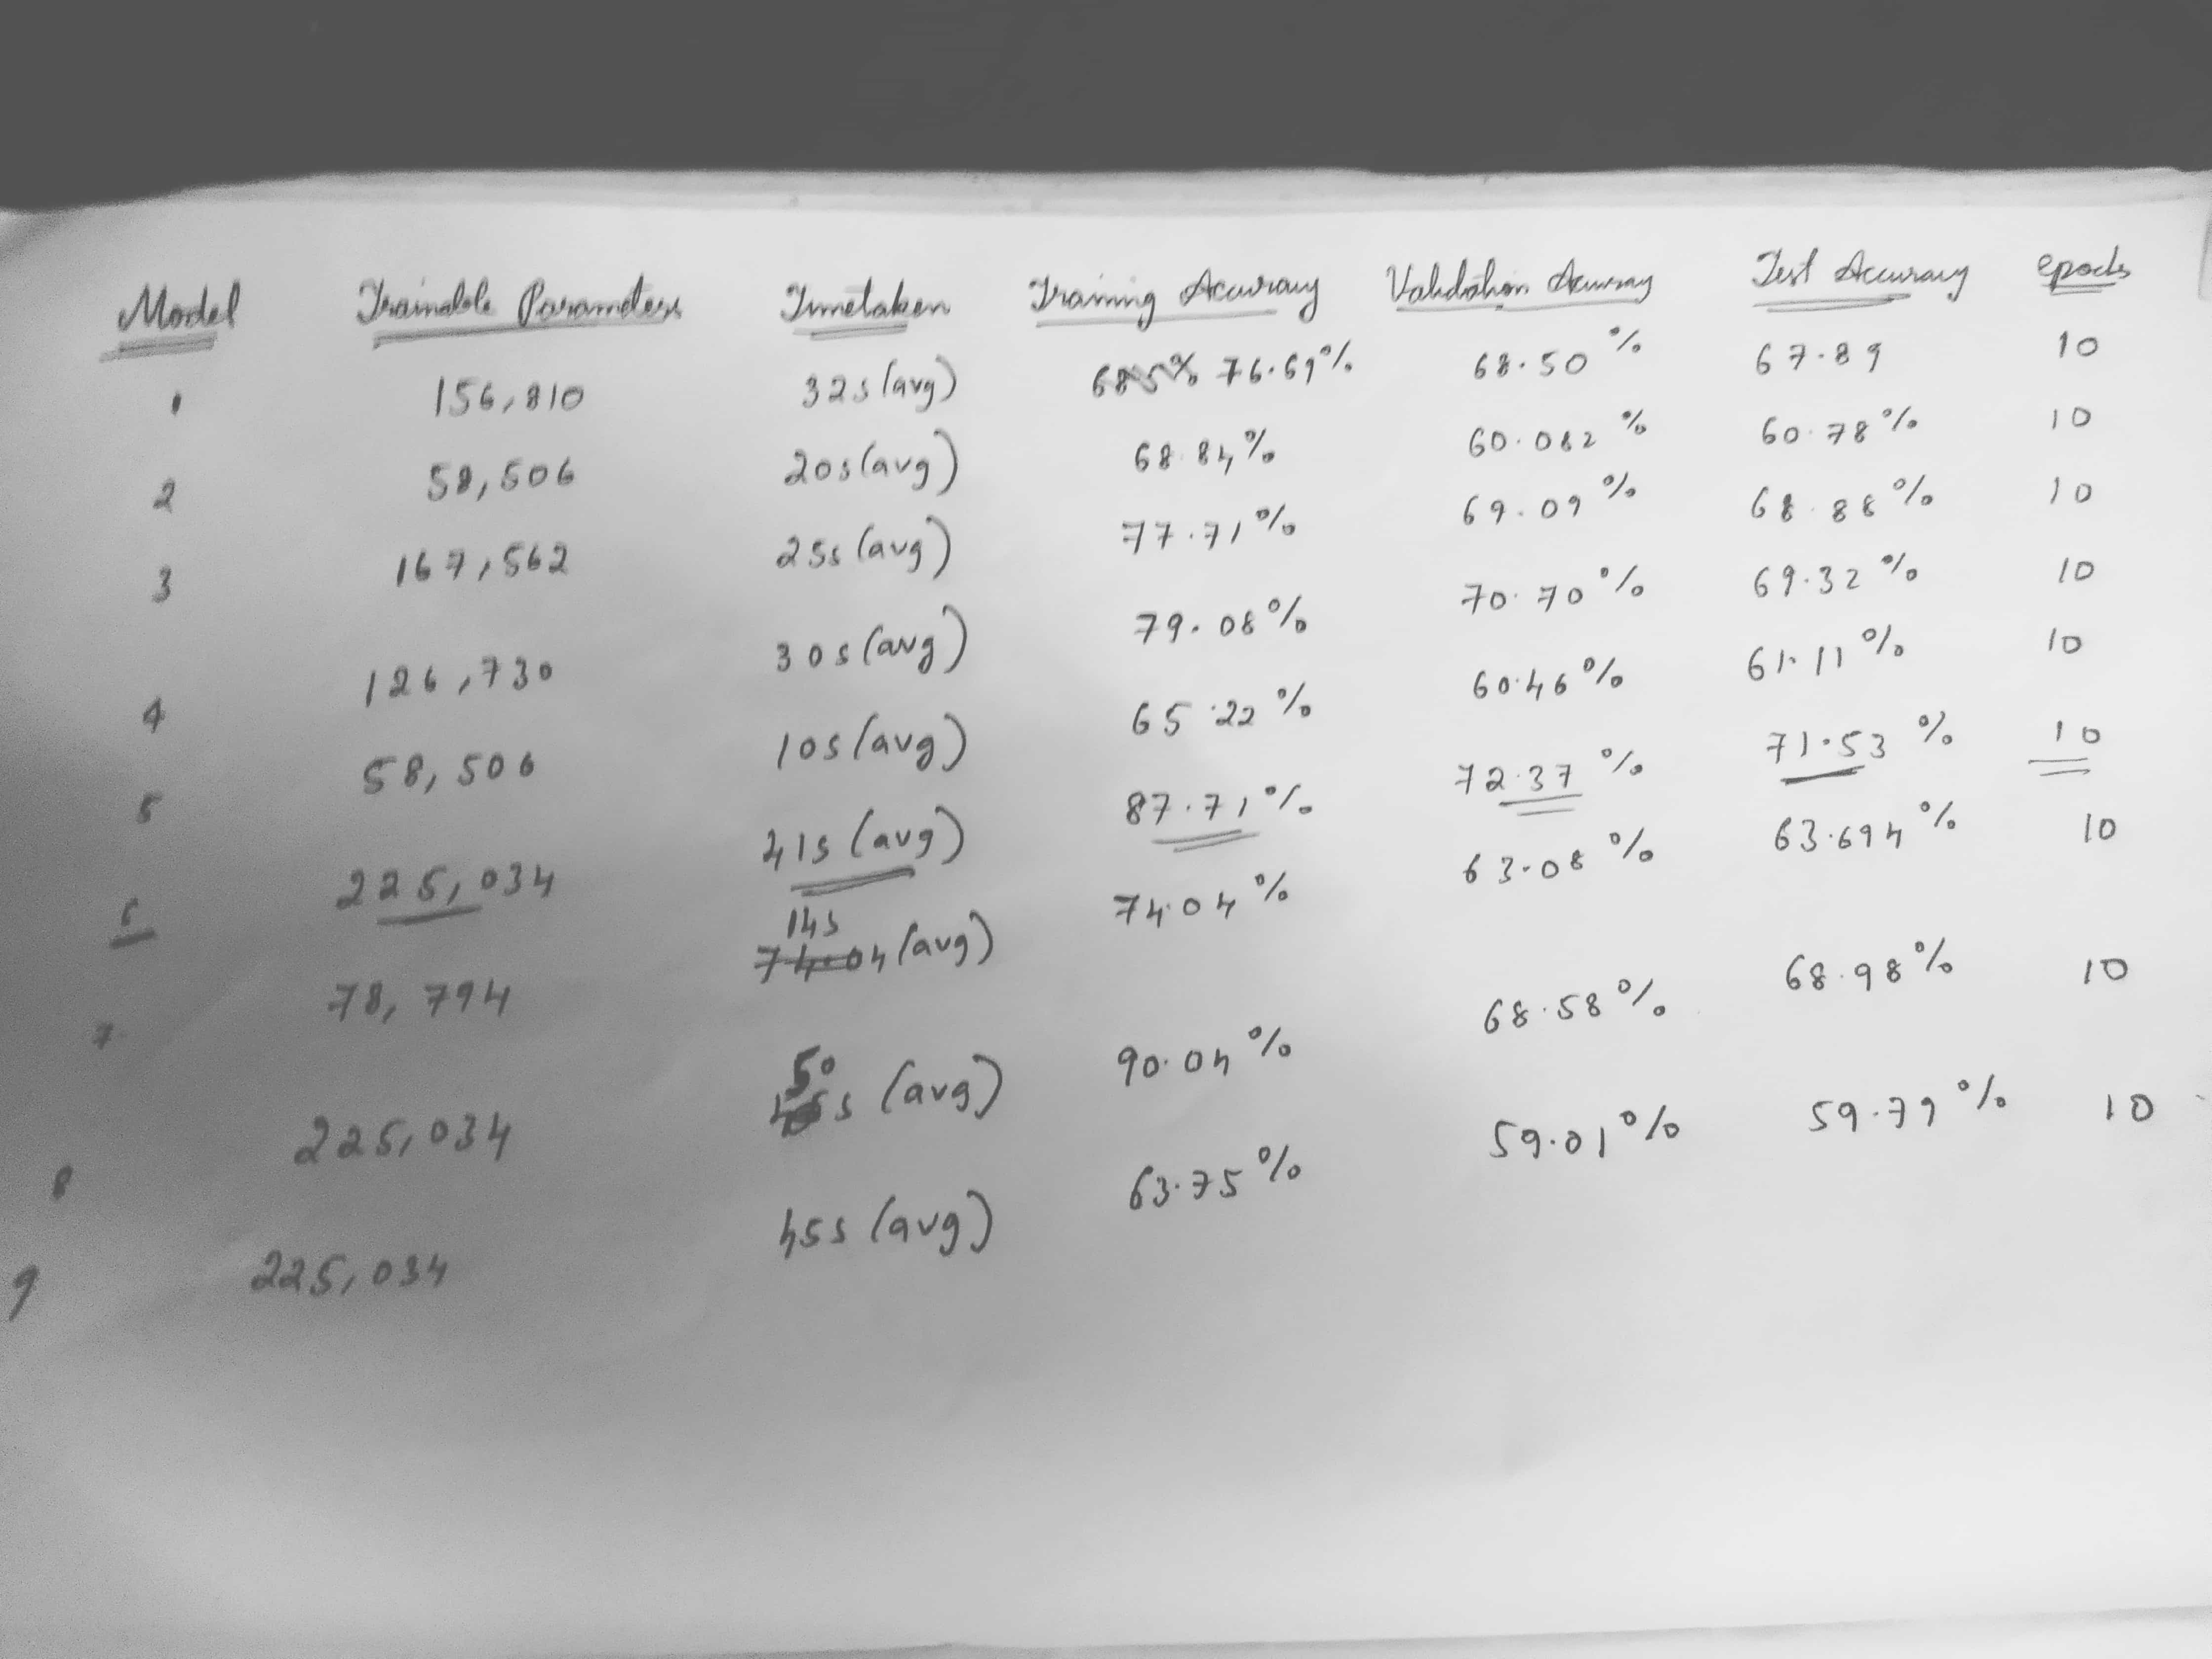